### Load Twitter Sentiment Data

- Load the twitter sentiment dataset, set the index, calculate engagement ratio and filter out stocks with no significant twitter activity.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
import matplotlib.ticker as mtick
plt.style.use('ggplot') 

In [24]:
data_folder = 'TwitterData\sentiment_data.csv'
sentiment_df = pd.read_csv(data_folder)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']) 
sentiment_df = sentiment_df.set_index(['date', 'symbol'])
sentiment_df 

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\94034\AppData\Local\Temp\ipykernel_24764\3815287273.py:1: SyntaxWarning: invalid escape sequence '\s'
  data_folder = 'TwitterData\sentiment_data.csv'


twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

Calculating the engagement ratio rather than relying solely on raw interaction figures offers a more accurate measure of genuine audience interest, helping to mitigate the impact of bots on social media metrics. This ratio assesses the quality of interactions (likes, comments, shares) relative to follower count or post reach, providing insights into content effectiveness and audience preferences. It aids in optimizing content strategies by highlighting what resonates most with the audience and allows for better comparative analysis across different platforms or competitors. Overall, focusing on engagement ratios can lead to more strategic decisions in marketing and content creation.

In [26]:
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']
sentiment_df = sentiment_df[(sentiment_df['twitterLikes'] > 20) & (sentiment_df['twitterComments'] > 10)]
sentiment_df 

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

### Aggregate Monthly and Calculate Average Sentiment for the Month

In [30]:
agg_sentiment_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])[['engagement_ratio']].mean())
agg_sentiment_df['rank'] = agg_sentiment_df.groupby('date')['engagement_ratio'].rank(ascending=False)
agg_sentiment_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

### Select Top 5 Stocks Based on their Cross-sectional Ranking for Each Month

In [43]:
filtered_df = agg_sentiment_df[agg_sentiment_df['rank'] <= 5]
filtered_df = filtered_df.reset_index('symbol')
filtered_df.index = filtered_df.index + pd.DateOffset(1)
filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])
filtered_df.head(20)


engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

### Extract the Stockls to Form Portfolios with at the Start of Each New Month

In [48]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for date in dates:

    fixed_dates[date.strftime('%Y-%m-%d')] = filtered_df.xs(date, level=0).index.tolist()

fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

### Download Fresh Stock Prices for Only Selected/Shortlised Stocks

In [51]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

stocks_list 

['AAPL',
 'AMD',
 'AMZN',
 'ATVI',
 'BA',
 'CRM',
 'ES',
 'F',
 'GOOG',
 'GOOGL',
 'JPM',
 'META',
 'MNST',
 'MSFT',
 'NFLX',
 'NKE',
 'NVDA',
 'PFE',
 'TSLA',
 'ABBV',
 'ABT',
 'C',
 'CMG',
 'DIS',
 'EA',
 'EBAY',
 'FCX',
 'GS',
 'K',
 'KEY',
 'KO',
 'MA',
 'MO',
 'MU',
 'PEP',
 'STZ',
 'T',
 'TSN',
 'V',
 'PG',
 'OXY',
 'AAL',
 'DAL',
 'EL',
 'GILD',
 'J',
 'LUV',
 'PM',
 'SLB',
 'AES',
 'REGN',
 'A',
 'D',
 'ILMN',
 'L',
 'CB',
 'HBAN',
 'BIIB',
 'MRO',
 'NUE',
 'BKR',
 'DD',
 'TMO',
 'AEP',
 'ENPH',
 'AAP',
 'MRNA',
 'INTC',
 'LMT',
 'NCLH',
 'JNJ',
 'PYPL',
 'BMY',
 'CVX',
 'HON',
 'XOM',
 'DVN',
 'MPC',
 'RCL',
 'AVGO',
 'DG',
 'DLTR',
 'MDT',
 'CCL',
 'ALB']

In [74]:
prices_df = yf.download(tickers=stocks_list, start='2021-01-01', end='2023-03-01')

[*********************100%%**********************]  85 of 85 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [75]:
prices_df = prices_df.dropna(axis=1, how='all')

### Calculate Portfolio Returns with Monthly Rebalancing

In [79]:
returns_df = np.log(prices_df['Adj Close']).diff().dropna()

returns_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,AEP,AES,ALB,AMD,...,RCL,REGN,SLB,STZ,T,TMO,TSLA,TSN,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.008143,0.019634,-0.001081,0.012288,0.010288,0.012297,-0.001350,0.033012,0.065304,0.005079,...,0.025548,0.001221,0.052363,0.000692,-0.006133,0.012427,0.007291,-0.000788,-0.015037,0.047068
2021-01-06,0.027053,0.005816,0.056165,-0.034241,-0.008676,-0.002084,0.007951,0.039189,0.072036,-0.026654,...,-0.004836,-0.028024,0.053862,0.031005,0.019293,0.015557,0.027995,0.029658,-0.008850,0.025197
2021-01-07,0.026261,-0.009062,0.008505,0.033554,0.010646,0.009660,-0.027044,-0.010059,0.049579,0.052090,...,0.024355,0.023359,0.019072,0.022759,0.002678,0.030686,0.076448,-0.011541,0.005581,0.007815
2021-01-08,0.007108,-0.016388,0.014154,0.008594,0.005234,0.002781,-0.008927,0.027519,0.000543,-0.006114,...,-0.013746,0.035782,-0.001609,0.005838,-0.006920,0.023643,0.075481,-0.009017,0.007641,0.011060
2021-01-11,0.008542,-0.008629,0.005629,-0.023523,0.016182,-0.006923,-0.005065,0.001572,-0.037692,0.027839,...,-0.011717,0.008366,0.006021,-0.014571,-0.005182,0.002048,-0.081442,0.011491,-0.011953,0.029905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009387,-0.008320,-0.003961,0.002892,-0.008788,-0.009305,-0.000330,-0.007064,0.018387,-0.002086,...,-0.003490,0.002088,-0.018713,-0.004447,0.008811,-0.004312,0.017528,0.016659,-0.002723,-0.013038
2023-02-23,0.007852,0.019727,-0.011273,0.003285,0.009249,-0.001364,-0.001212,0.000000,0.029584,0.040169,...,0.002793,0.015361,0.017214,0.015546,-0.001549,0.004639,0.006006,0.009992,0.005032,0.009162
2023-02-24,-0.014065,-0.019727,-0.022503,-0.018169,0.004200,-0.020591,-0.003091,-0.002761,-0.017204,-0.021035,...,-0.021709,-0.003521,0.011190,-0.006716,-0.005701,-0.014922,-0.026020,-0.018287,-0.007171,0.000090


In [80]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd()).strftime('%Y-%m-%d')

    cols = fixed_dates[start_date]

    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')

    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

portfolio_df

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


### Download NASDAQ/QQQ Prices and Calculate Returns to Compare to Developed Quant Strategy

In [82]:
qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')

qqq_returns = np.log(qqq_df['Adj Close']).diff().dropna().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_returns, left_index=True, right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


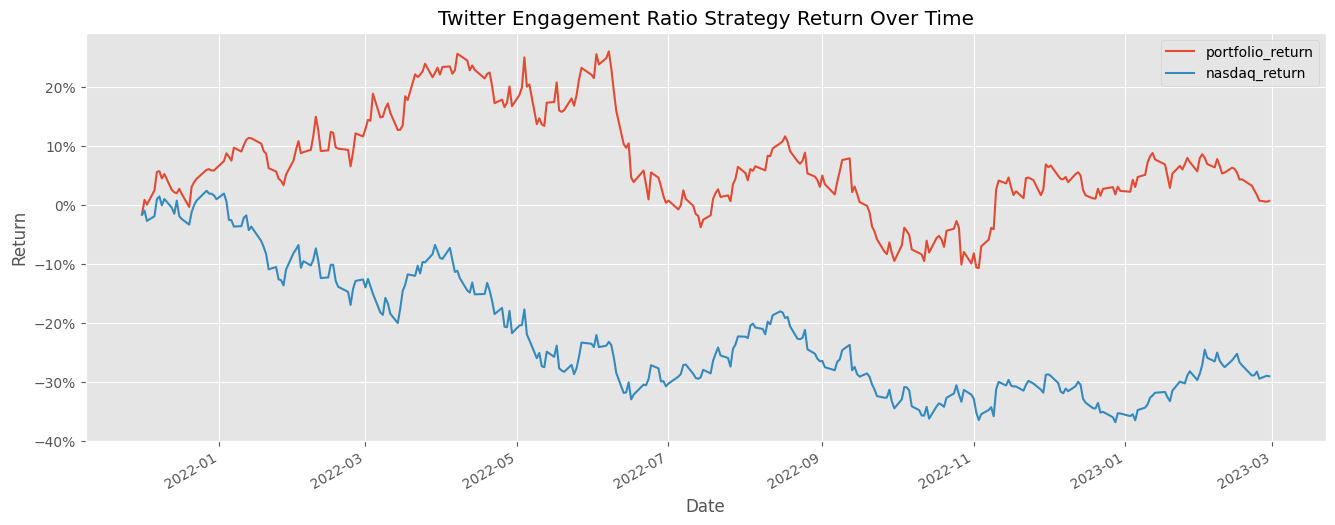

In [85]:
portfolios_cumulative_returns = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_returns.plot(figsize=(16, 6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()